<h1><b>Statistique en Bioinformatique : </b> TME4 </h1>
<br>
L’objectif de ce TME sont: 
<br>
<ul>
<li> objectif 1 : Utiliser les chaines de Markov pour comprendre les états phénotypiques de cellules cancéreuses.   </li> 
<li> objectif 2 : étudier la dynamique des proportions phénotypiques dans les lignées cellulaires du cancer du sein humain: SUM159 et SUM149</li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME3.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre sur moodle </li>
</div>


Nom etudiant 1 : Antoine Grislain
<br>
Nom etudiant 2 : Simon Liétar
<br>

<h3>Introduction</h3>
<ul>
<li> Les cellules cancéreuses au sein des tumeurs existent souvent dans des états phénotypiques distincts.</li>
<li> Les sous-populations de cellules purifiées pour un état phénotypique reviennent vers des proportions d'équilibre dans le temps.</li>
<li> Cet équilibre peut s'expliquer par un modèle de Markov dans lequel les cellules passent de manière stochastique entre les états.  </li>
</ul>

<img src="img/CellStateTransition.png" />

<b>Exercice 1</b>:
Traduire les graphes de transition de la figure D en matrices de transition, 
$P_{149}$ et $P_{159}$. Verifier bien que les matrices et les vecteur  $\pi_{0}$ soitent normalisés.


In [110]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.legend_handler import HandlerLine2D
import random
import math as mt

# Distribuition initiale vecteur pi_0 S, L, B
pi0_149 = np.array([0.039, 0.033, 0.9280])
pi0_159 = np.array([0.019, 0.973, 0.0062])


# Matrices
p_149 = np.array([[0.61, 0.30, 0.09], [0.01, 0.99, 0.00], [0.01, 0.08, 0.90]])
p_159 = np.array([[0.58, 0.07, 0.35], [0.04, 0.47, 0.49], [0.01, 0.00, 0.99]])

# Normaliser les vecteurs π0.

def normalise(m: np.ndarray):
    """
    Normalise a matrix
    input1 m: matrix
    output1 mN: normalised matrix
    """

    return m / m.sum(axis=-1, keepdims=True)

print (normalise(p_149))
#[[0.61       0.3        0.09      ]
# [0.01       0.99       0.        ]
# [0.01010101 0.08080808 0.90909091]]


print (normalise(p_159))
#[[0.58 0.07 0.35]
# [0.04 0.47 0.49]
# [0.01 0.00 0.99]]


pi0_149 = normalise(pi0_149)
pi0_159 = normalise(pi0_159)

p_149 = normalise(p_149)
p_159 = normalise(p_159)

[[0.61       0.3        0.09      ]
 [0.01       0.99       0.        ]
 [0.01010101 0.08080808 0.90909091]]
[[0.58 0.07 0.35]
 [0.04 0.47 0.49]
 [0.01 0.   0.99]]


<b>Exercice 2</b>: Déterminer les états stationnaires 
$\pi^\star_{149}$ et $\pi^\star_{159}$. 
Est-ce que les valeurs que vous trouvez sont consistentes avec les 
valeurs experimentales en Fig. 1?

In [34]:
#You can use the function numpy.linalg.eig
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

# mat = np.array([[1, 2], [20, 60]])
# eigenvalues, eigenvectors = np.linalg.eig(mat)

# print (eigenvalues,"\n" ,eigenvectors)

def get_stationary(mat: np.ndarray):
  eigenvalues, eigenvectors = np.linalg.eig(normalise(mat).T)
  return normalise(eigenvectors[:, np.where(np.isclose(eigenvalues, 1))[0][0]])

pi_stat_149 = get_stationary(p_149)
pi_stat_159 = get_stationary(p_159)

print ("Pi star 149 " , pi_stat_149)
print ("Pi star 159 " , pi_stat_159)

#Pi star 149  [0.02500625 0.95023756 0.02475619]
#Pi star 159  [0.0234721  0.00310009 0.97342781]


Pi star 149  [0.02500625 0.95023756 0.02475619]
Pi star 159  [0.0234721  0.00310009 0.97342781]


<b>Exercice 3</b>: Déterminer les matrices de transition $P_{149}^n$ et $P_{159}^n$ pour $n$ 
iterations avec $n=2,4,8,16,32,64$, imprimer toutes les matrices. Computer les vectors $\pi^{(n)}$ et les comparer avec
$\pi^\star_{149,159}$. Utilisez le $\pi^0$ du papier de Gupta, page 2, ci-dessous.

In [86]:
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])


#matrice P**n
def matTransN(P: np.ndarray, n: int):
    """
    Compute the transition matrix after N iterations
    input1 P: matrix
    input2 n: number of iterations
    output Pn: transition matrix after N iterations
    """

    return np.linalg.matrix_power(P, n)

#matrice P**n where n = 2,4,8,16,32,64
def printMat(P: np.ndarray, n: int, pi_0: np.ndarray, M_name: str):
    """
    Print all P**n matrices, where n in  {2,4,8,16,32,64, ...}
    input1 P: matrix
    input2 n: number of iterations
    input3 pi_0: initial condition
    input4 M_name: matrix identifier
    output: None
    """

    return f'[{M_name}]\n{chr(0x0a).join([f"n = {2 ** k}: {pi_0[0, :] @ matTransN(P, 2 ** k)}" for k in range(1, n + 1)])}\n       {get_stationary(P)}\n'


print (printMat(p_149, 4, pi_zero_149, '149'))
print (printMat(p_159, 4, pi_zero_159, '159'))

[149]
n = 2: [0.03004538 0.93648468 0.03346994]
n = 4: [0.02682171 0.94053617 0.03264212]
n = 8: [0.02524301 0.94432177 0.03043522]
n = 16: [0.02501107 0.94755198 0.02743695]
       [0.02500625 0.95023756 0.02475619]

[159]
n = 2: [0.02207818 0.00346454 0.97265728]
n = 4: [0.0229994  0.00307862 0.97212198]
n = 8: [0.02338257 0.00307645 0.97174098]
n = 16: [0.0234292  0.00309414 0.97167665]
       [0.0234721  0.00310009 0.97342781]



Les $\pi^{(n)}$ semblent tendre vers $\pi^*$ pour $n \rightarrow\infty$.

<b> Exercice 4 </b>:
 Ecrire une fonction pour déterminer les
$(\pi^{(t)})_{t=1:n}$ d'une chaine de Markov à trois états. Appliquer
pour $P_{149}$ et $P_{159}$, pour les conditions initiales 
$\pi^{(0)}\in\{ (0.998,0.001,0.001), (0.001,0.998,0.001), 
(0.001,0.001,0.998) \}$ et pour $n=20$ itérations de la chaine 
de Markov. Visualiser graphiquement les résultats.


In [87]:

def Pi_n(pi_0: np.ndarray, P: np.ndarray, n: int):
    """
    Compute Pi_n = Pi_0*P^n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output Pi_n
    """

    return pi_0 @ matTransN(P, n)


In [88]:
def List_Pi_n(pi0: np.ndarray, P: np.ndarray, n: int):
    """
    Compute a list of  Pi_n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output liste_M_trans: list
    """

    return np.array([Pi_n(pi0, P, k) for k in range(1, n)])


In [89]:
def plot(liste_Pi_n: np.ndarray):
    """
    Plot liste_Pi_n
    """

    fig, ax = plt.subplots()
    ax.plot(np.arange(liste_Pi_n.shape[0]), liste_Pi_n, label=['S', 'L', 'B'])
    ax.legend()

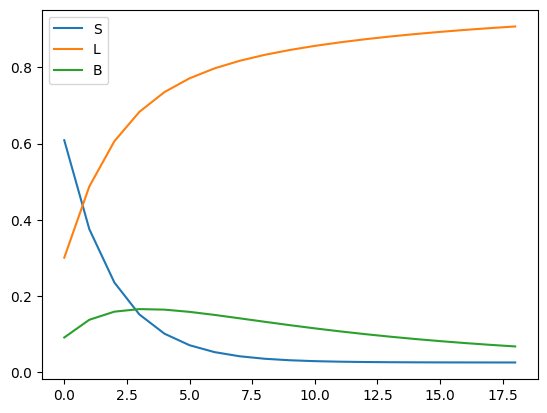

In [90]:
pi1 = np.array([0.998,0.001,0.001])
plot(List_Pi_n(pi1, p_149, 20))

<b> Exercice 5 </b>:
Ecrire une fonction pour simuler la trajectoire stochastique
$(x_t)_{t=0:n}$ d'une seule réalisation de la chaiine de Markov. 
Créer des population de $N=10,100,1000,10000$ trajectoires. Estimer 
la trajectoire moyenne de chaque population.


In [105]:
def Trajectoire (n: int, Pi_0: np.ndarray, P: np.ndarray):
    """
    simulate the stochastic trajectory
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output Traj: list of states that simulates the stochastic trajectory ['S', 'B', 'L']
    """

    # [0.6, 0.2, 0.2]
    # [0.6, 0.8, 1.0]

    traj = np.empty(n, dtype=int)
    traj[0] = np.random.choice(len(Pi_0), p=Pi_0)

    for i in range(1, n):
        traj[i] = np.random.choice(len(Pi_0), p=P[traj[i - 1], :])

    return traj

#Déterminer une trajectoire pour N population.
def Trajectoire_P(n: int, Pi_0: np.ndarray, P: np.ndarray, N: int):
    """
    Simulate a trajectory for N population.
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajP: trajectory
    """

    return np.array([Trajectoire(n, Pi_0, P) for _ in range(N)])

#Estimer la trajectoire moyenne d'une chaine de markov pou N

def Trajectoire_moy(n: int, Pi_0: np.ndarray, P: np.ndarray, N: int):
    """
    Find the mean tragetoire
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajMoy: mean trajectory
    """

    traj = Trajectoire_P(n, Pi_0, P, N)
    mean_traj = np.zeros((3, n))

    for i in range(N):
        for j in range(n):
            mean_traj[traj[i, j], j] += 1

    return mean_traj

# print(Trajectoire_P(100, pi1, p_149, 5).shape)
print(Trajectoire_moy(100, pi1, p_149, 5))

#Visualiser graphique des trajectoires.
def plotTrajectory(t: np.ndarray):
    """
    Plot Trajectory
    input1 t: trajectory
    """

    fig, ax = plt.subplots()

    ax.plot(np.arange(t.shape[1]), t.T, label=['S', 'L', 'B'])
    ax.legend()


[[5. 3. 3. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]
 [0. 2. 2. 3. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4.
  4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 4. 4. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 4. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


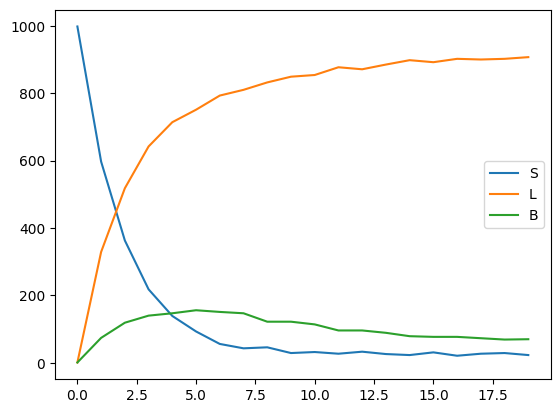

In [108]:
plotTrajectory(Trajectoire_moy(20, pi1, p_149, 1000))

<b> Exercice 6 </b>: 
Ecrire une fonction pour calculer la probabilité d'une trajectoire
$(x_t)_{t=0:n}$. Pour y facilite vous devez applique le log et utlise la some au
lieu du product.  Ensuite vouz devez comparer les probabilités de 
deux chaiines de Markov $P_{149}$ et $P_{159}$. Visualiser les histogrammes pour les deux populations de taille $N=10000$ (géenérées avec $P_{149}$ et $P_{159}$). Est-ce que vous observez des différences entre les deux modèles? Comment est-ce que vous expliquer cettes différences?

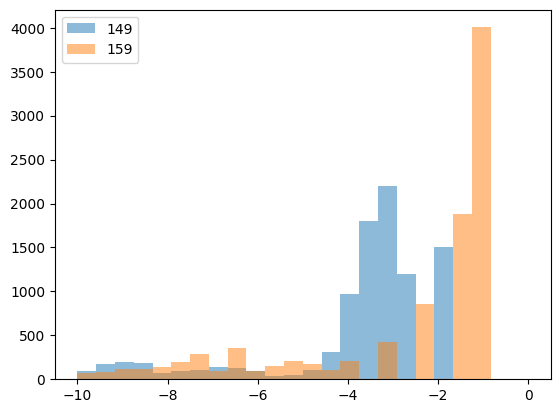

In [132]:
#Calculer la probabilité d’une trajectoire (xt)t=0:n
def Pb_Trajectoire(Traj: np.ndarray, Pi_0: np.ndarray, P: np.ndarray):
    """
    Compute the probability of a trajectory
    input1 Traj: a trajectory
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output Proba: ptobability
    """

    proba = np.log(Pi_0[Traj[0]])

    for i in range(1, Traj.shape[0]):
        proba += np.log(P[Traj[i - 1], Traj[i]])

    return proba


def Histo (Trajs: np.ndarray, Pi_0: np.ndarray, P: np.ndarray):
    """
    compute a histogramm of Trajectory probabilities
    input1 Trajs: a trajectory population
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output pop: a list of probabilities
    """

    return np.array([Pb_Trajectoire(Trajs[i, :], Pi_0, P) for i in range(Trajs.shape[0])])

def plotHist(Histo149: np.ndarray, Histo159: np.ndarray):
    """
    Plot two probabilities histogram
    input1 Histo149: a list of probabilities for P149
    input1 Histo159: a list of probabilities for P159
    """

    fig, ax = plt.subplots()

    # proba_min = min(Histo149.min(), Histo159.min())
    # proba_max = max(Histo149.max(), Histo159.max())

    proba_min = -10
    proba_max = 0

    ax.hist(Histo149, alpha=0.5, bins=np.linspace(proba_min, proba_max, 25), label='149')
    ax.hist(Histo159, alpha=0.5, bins=np.linspace(proba_min, proba_max, 25), label='159')
    ax.legend()


    # probas = Histo()

#-------------------------------------------------------------
plotHist(Histo(Trajectoire_P(20, pi0_149, p_149, 10000),pi0_149, p_149), Histo(Trajectoire_P(20, pi0_159, p_159, 10000),pi0_159, p_159))
